## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## Load the CocaCola prices dataset 

In [2]:
data = pd.read_excel('../Datasets/Airlines+Data.xlsx')

In [3]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
data.isna().sum().sum()

0

In [8]:
data.duplicated().sum()

0

In [9]:
# Set 'Month' as the index
data.set_index('Month', inplace=True)

In [10]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


## Visualization

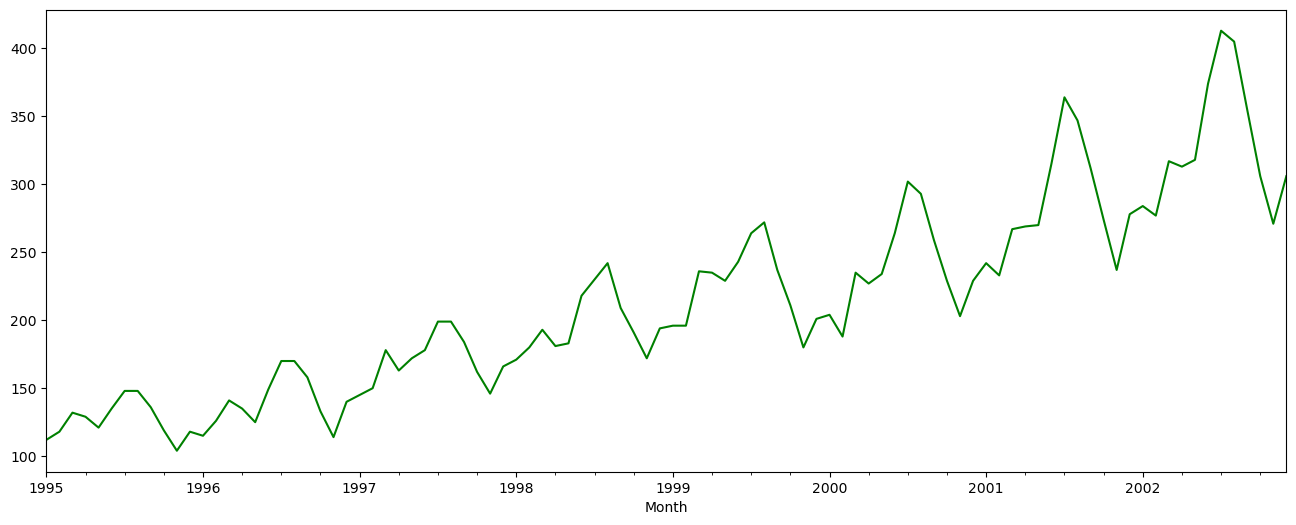

In [14]:
data['Passengers'].plot(figsize=(16,6), color='green',kind='line')
plt.show()

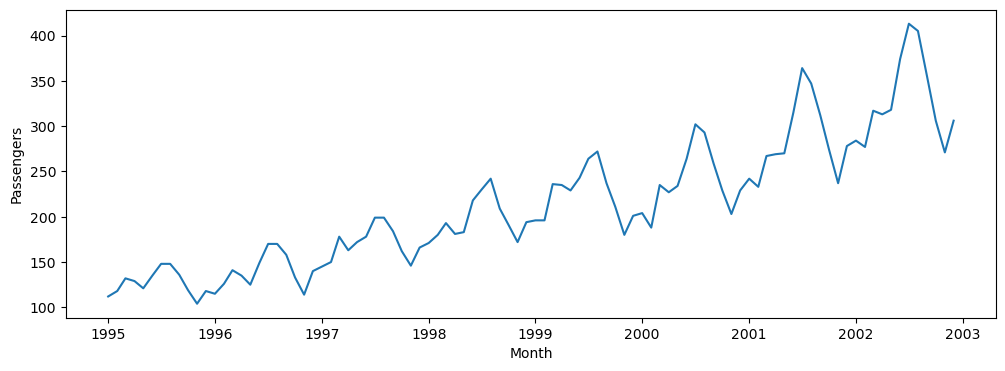

In [15]:
plt.figure(figsize=(12,4))
sns.lineplot(x="Month", y="Passengers", data=data)
plt.show()

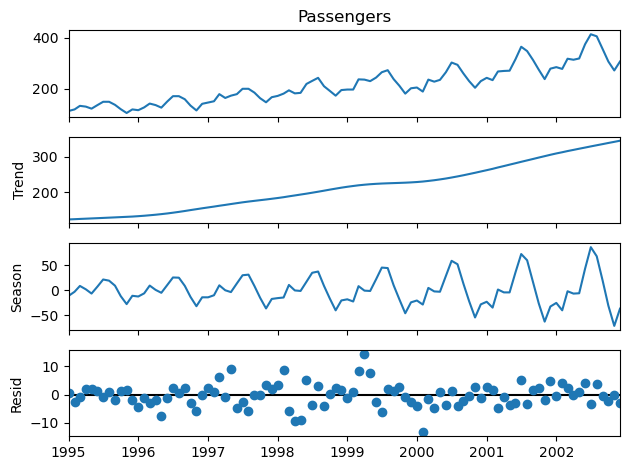

In [16]:
from statsmodels.tsa.seasonal import STL
df = STL(data['Passengers']).fit()
df.plot()
plt.show()

## Model Buliding

In [19]:
# Create a time lag feature for time series forecasting
data['Passengers_Lag1'] = data['Passengers'].shift(1)


In [20]:
data.head()

,Passengers,Passengers_Lag1
Month,,
1995-01-01,112,NaN
1995-02-01,118,112.0
1995-03-01,132,118.0
1995-04-01,129,132.0
1995-05-01,121,129.0


In [21]:
# Drop NaN values
data.dropna(inplace=True)


In [22]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

In [23]:
train.shape, test.shape

((76, 2), (19, 2))

In [24]:
# Define features and target variable
X_train = train[['Passengers_Lag1']]
y_train = train['Passengers']
X_test = test[['Passengers_Lag1']]
y_test = test['Passengers']

In [25]:
X_train.head()

,Passengers_Lag1
Month,
1995-02-01,112.0
1995-03-01,118.0
1995-04-01,132.0
1995-05-01,129.0
1995-06-01,121.0


In [26]:
X_test.head()

,Passengers_Lag1
Month,
2001-06-01,270.0
2001-07-01,315.0
2001-08-01,364.0
2001-09-01,347.0
2001-10-01,312.0


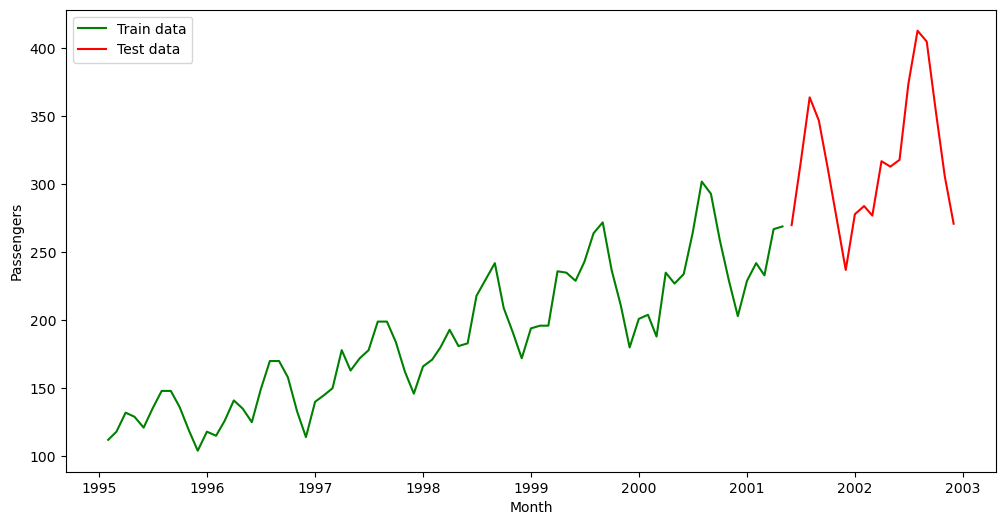

In [30]:
plt.figure(figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.plot(X_train, 'green', label='Train data')
plt.plot(X_test, 'red', label='Test data')
plt.legend()
plt.show()

##  Linear Regression

In [27]:
# Train the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# Make predictions on the test set
predictions_lr = model_lr.predict(X_test)


In [29]:
predictions_lr 

array([266.06710758, 307.82412776, 353.29288307, 337.51800878,
       305.04032642, 269.77884271, 235.44529279, 273.49057784,
       279.05818053, 272.56264406, 309.67999533, 305.9682602 ,
       310.60792911, 362.57222088, 398.76163837, 391.33816812,
       344.94147903, 299.47272373, 266.99504136])

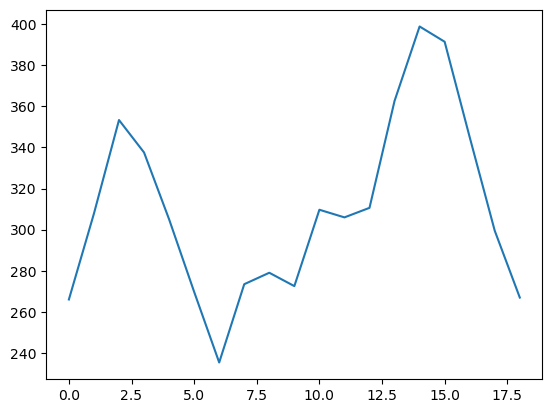

In [34]:

plt.plot(predictions_lr )
plt.show()

In [35]:
model_residuals = pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [36]:
# Evaluate the linear regression model
mse_lr = mean_squared_error(y_test,predictions_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test,predictions_lr)
mape_lr = mean_absolute_percentage_error(y_test,predictions_lr)
model_residuals['Predict'] = [mse_lr,rmse_lr,mae_lr,mape_lr]
model_residuals

,Predict
MSE,1268.649887
RMSE,35.618112
MAE,30.445567
MAPE,0.095604


##  Random Forest Regression

In [37]:
# Train the random forest regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Make predictions on the test set
predictions_rf = model_rf.predict(X_test)

In [39]:
predictions_rf

array([264.6  , 282.35 , 282.35 , 282.35 , 282.35 , 252.02 , 219.412,
       252.02 , 256.92 , 252.02 , 282.35 , 282.35 , 282.35 , 282.35 ,
       282.35 , 282.35 , 282.35 , 282.35 , 251.73 ])

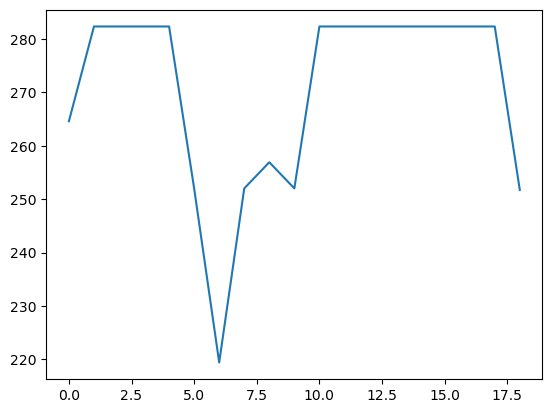

In [40]:
plt.plot(predictions_rf )
plt.show()

In [41]:
# Evaluate the linear regression model
mse_rf = mean_squared_error(y_test,predictions_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test,predictions_rf)
mape_rf = mean_absolute_percentage_error(y_test,predictions_rf)
model_residuals['Predict'] = [mse_rf,rmse_rf,mae_rf,mape_rf]
model_residuals

,Predict
MSE,3961.881276
RMSE,62.943477
MAE,52.553579
MAPE,0.154514


## Plotting actual vs. predicted values

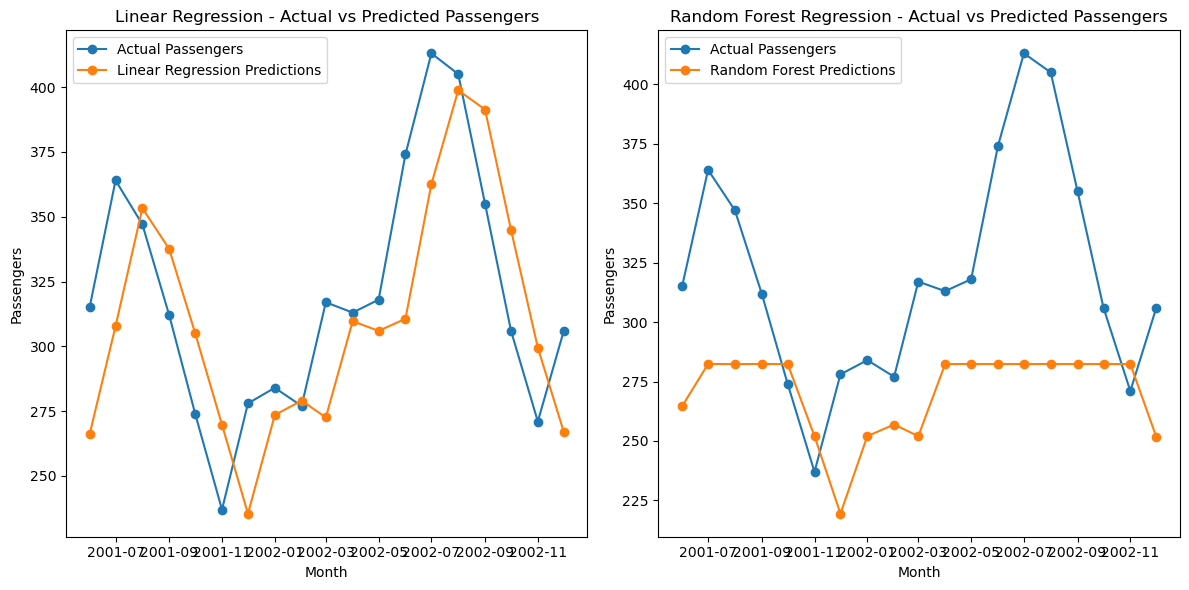

In [42]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(test.index, y_test, label='Actual Passengers', marker='o')
plt.plot(test.index, predictions_lr, label='Linear Regression Predictions', marker='o')
plt.title('Linear Regression - Actual vs Predicted Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test.index, y_test, label='Actual Passengers', marker='o')
plt.plot(test.index, predictions_rf, label='Random Forest Predictions', marker='o')
plt.title('Random Forest Regression - Actual vs Predicted Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()

plt.tight_layout()
plt.show()

## Model Explanation Document

In [43]:
# Linear Regression Explanation
linear_regression_document = """
Linear Regression Model:

Dummy Variables: No dummy variables were created in this model.

RMSE Value: {}
""".format(rmse_lr)

In [44]:
# Random Forest Regression Explanation
random_forest_document = """
Random Forest Regression Model:

Dummy Variables: No dummy variables were created in this model.

RMSE Value: {}
""".format(rmse_rf)

## Conclusion

In [45]:
# Choose the model with the lowest RMSE
if rmse_lr < rmse_rf:
    chosen_model = "Linear Regression"
    final_model = model_lr
    explanation_document = linear_regression_document
else:
    chosen_model = "Random Forest Regression"
    final_model = model_rf
    explanation_document = random_forest_document



In [46]:
# Print the chosen model
print(f"The chosen model for forecasting is: {chosen_model}")


The chosen model for forecasting is: Linear Regression


In [47]:
# Optionally, you can further analyze the final model (coefficients, etc.)
print(f"Coefficients for Linear Regression: {model_lr.coef_}")

Coefficients for Linear Regression: [0.92793378]


In [48]:
# Print the explanation document
print(explanation_document)


Linear Regression Model:

Dummy Variables: No dummy variables were created in this model.

RMSE Value: 35.61811178068089

